In [18]:
import pandas as pd
import networkx as nx
from karateclub import DeepWalk 
from karateclub import Node2Vec
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
G = nx.karate_club_graph()

In [4]:
print('Number of nodes (club-members) :', len(G.nodes))

Number of nodes (club-members) : 34


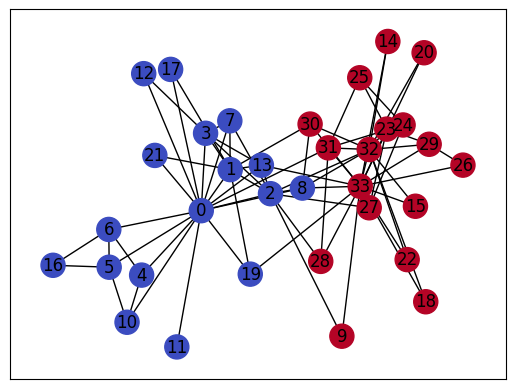

In [13]:
" plot the graph with labels"
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'Officer' or 'Mr.Hi'
    
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')

## DeepWalk Embedding

In [15]:
" Perform node embedding using DeepWalk "
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )

Embedding array shape (nodes x features): (34, 124)


Low dimensional embedding representaiton (nodes x 2): (34, 2)


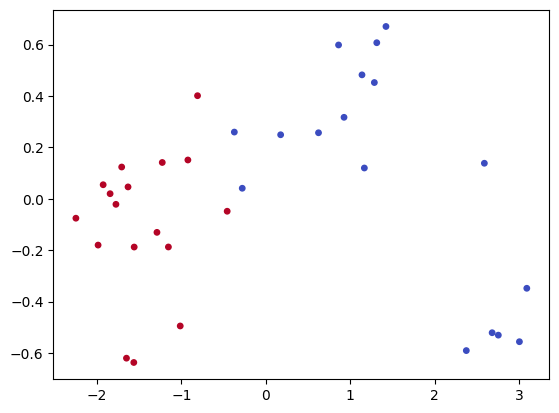

In [21]:
" Low dimensional plot of the neodes x features"

PCA_model = sklearn.decomposition.PCA(n_components=2)

lowdimension_embedding = PCA_model.fit_transform(embedding)

plt.scatter(lowdimension_embedding[:,0], lowdimension_embedding[:,1], c=labels,
            s=15,cmap='coolwarm')
plt.show()

#### Clustering

In [37]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2)
yhat = model.fit_predict(embedding)

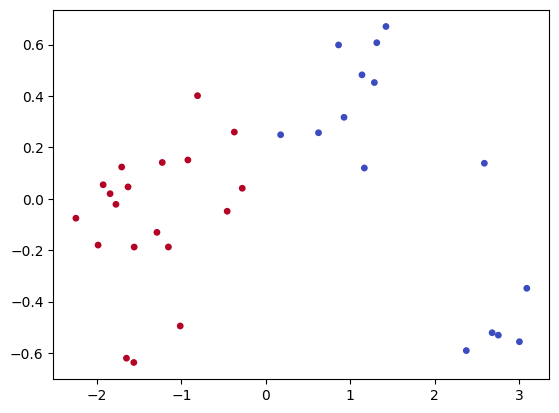

In [39]:
" Low dimensional plot of the neodes x features"

PCA_model = sklearn.decomposition.PCA(n_components=2)

lowdimension_embedding = PCA_model.fit_transform(embedding)

plt.scatter(lowdimension_embedding[:,0], lowdimension_embedding[:,1], c=yhat,
            s=15,cmap='coolwarm')
plt.show()

## Node2Vec Embedding

In [40]:
" Perform node embedding using Node2Vec "
N2vec_model = Node2Vec(walk_number=10, walk_length=80,p=0.9 ,q=0.1,dimensions=124)

N2vec_model.fit(G)
N2Vec_embedding = N2vec_model.get_embedding()
print('Embedding array shape (nodes x features):',N2Vec_embedding.shape )

Embedding array shape (nodes x features): (34, 124)


Low dimensional embedding representaiton (nodes x 2): (34, 2)


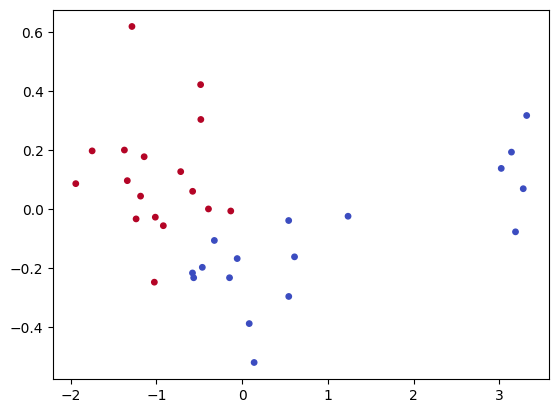

In [41]:
lowdimension_n2vembedding = PCA_model.fit_transform(N2Vec_embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_n2vembedding.shape)
plt.scatter(lowdimension_n2vembedding[:,0],lowdimension_n2vembedding[:,1],c=labels,
            s=15,cmap='coolwarm')

#### Clustering

In [49]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(N2Vec_embedding)
yhat = model.labels_

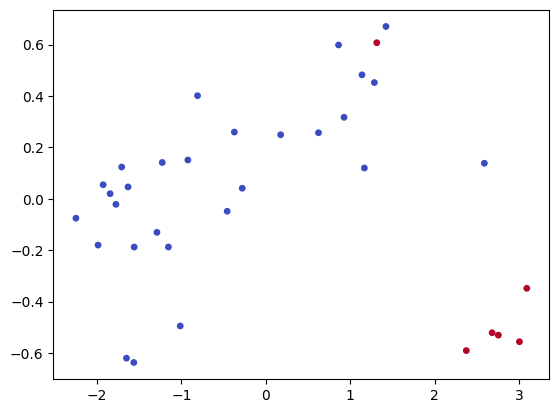

In [50]:
" Low dimensional plot of the neodes x features"

PCA_model = sklearn.decomposition.PCA(n_components=2)

lowdimension_embedding = PCA_model.fit_transform(embedding)

plt.scatter(lowdimension_embedding[:,0], lowdimension_embedding[:,1], c=yhat,
            s=15,cmap='coolwarm')
plt.show()

# Node Classification using Embedded models

In [51]:
" Node classification using embedded model"
x_train,x_test,y_train,y_test = train_test_split(embedding, labels, test_size=0.3, random_state=42)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('DepWalk AUC:',ML_acc)


nx_train,nx_test,ny_train,ny_test = train_test_split(N2Vec_embedding, labels, test_size=0.3, random_state=42)
nML_model = LogisticRegression(random_state=0).fit(nx_train,ny_train)
ny_predict = nML_model.predict(nx_test)
nML_acc = roc_auc_score(ny_test,ny_predict)
print('Node2Vec AUC:',nML_acc)

DepWalk AUC: 0.9
Node2Vec AUC: 0.8
